# **Problem Statemet**

The goal of this project is to forecast sales across various products and locations for an Online grocery retailor Small Basket. Daily historical data is provided from January 2015 to December 2018. The objective is to forecast the unit_sales sold for each item across various locations from 1st January to 15th January.

The below notebook will load, merge, clean and explore the data. The focus is to understand where is the source for Unit_sales from items, seasonality, locations and category of the items.

The Notebook Contains

Part 1: Data Preprocessing

Part 2: Exploratory Data Analysis (EDA)

Part 3: Model Building

# *Part1: Data Preprocessing*

Code to increase the Ram size of Google Colab

In [ ]:
a=[]
while(1):
  a.append('1')

Mounting Google Drive to Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Import Necessary Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
os.getcwd()

'/content'

In [4]:
os.chdir("/content/gdrive/My Drive/PHD/INPUT_DATA")

In [5]:
!ls

EDA.ipynb	      sample_sub_XGBoost.csv  unit_sales_predctions_Linear.csv
FinalDataset	      test.csv		      unit_sales_pred_decisiontree.csv
item_data	      test_data		      unit_sales_pred_XGBoost.csv
item_details.csv      Test_data		      xgb_regressor_model
location_data	      train.csv		      X_test
location_details.csv  train_data	      X_train
merge1		      train_data_Preprocess   y_test
merge2		      train_locations_items   y_train
Pickled_files	      train_transactions
salesData	      train_transactions.csv


Load the train_data

In [6]:
train_data=pd.read_csv("train.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train_data.dtypes

date            object
locationId      object
item_id         object
unit_sales     float64
onpromotion     object
dtype: object

Type casting

In [ ]:
### Customized function for type conversion of data
def dtypeConversion(df):  
  for i in df.select_dtypes('object'):
    df[i]=df[i].astype('category')

In [ ]:
dtypeConversion(train_data)

In [ ]:
train_data.dtypes

date           category
locationId     category
item_id        category
unit_sales      float64
onpromotion    category
dtype: object

In [ ]:
# Type conversion for date
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['date']= train_data['date'].astype('category').astype('datetime64[ns]')

In [ ]:
train_data.shape

(101688779, 5)

In [ ]:
## droping the duplicates for the train_data
train_data =train_data.drop_duplicates()

In [ ]:
train_data.shape

(101678735, 5)

Dumping the data frames into pickle files

In [10]:
PATH='/content/gdrive/My Drive/Pickle_files'
if os.path.exists(PATH):
  shutil.rmtree(PATH)
os.mkdir(PATH)

In [9]:
### Customized function to write a pickle file
def pickleFileDump(fileName,df):
  outfile=open(fileName,'wb')
  pkl.dump(df,outfile)
  outfile.close()

In [8]:
### Customized function to read a pickle file
def readPickleFile(fileName):
  infile=open(fileName,'rb')
  df = pkl.load(infile)
  infile.close()
  return df

In [ ]:
pickleFileDump('train_data',train_data)


Load the location data

In [ ]:
location_data=pd.read_csv("location_details.csv")

In [ ]:
location_data.dtypes

location_id    object
city           object
state          object
type           object
cluster         int64
dtype: object

In [ ]:
##Type conversion
dtypeConversion(location_data)

In [ ]:
location_data.dtypes

location_id    category
city           category
state          category
type           category
cluster           int64
dtype: object

In [ ]:
location_data.shape

(54, 5)

In [ ]:
### Removing the duplicates in the data if any
location_data = location_data.drop_duplicates()

In [ ]:
location_data.shape

(54, 5)

In [ ]:
pickleFileDump('location_data',location_data)

Loading the item data

In [ ]:
item_data=pd.read_csv("item_details.csv")

In [ ]:
item_data.dtypes

item_id             object
category_of_item    object
class               object
perishable           int64
dtype: object

In [ ]:
##Type conversion
dtypeConversion(item_data)

In [ ]:
item_data.dtypes

item_id             category
category_of_item    category
class               category
perishable             int64
dtype: object

In [ ]:
item_data.shape

(4100, 4)

In [ ]:
item_data = item_data.drop_duplicates()

In [ ]:
item_data.shape

(4100, 4)

In [ ]:
pickleFileDump('item_data',item_data)

Loading the train_transactions data

In [ ]:
train_transactions=pd.read_csv("train_transactions.csv")

In [ ]:
train_transactions.dtypes

date                   object
location_identifier    object
transactions            int64
dtype: object

In [ ]:
dtypeConversion(train_transactions)

In [ ]:
train_transactions['date'] = pd.to_datetime(train_transactions['date'])   
train_transactions['date'] = train_transactions['date'].astype('datetime64[ns]')

In [ ]:
train_transactions.dtypes

date                   datetime64[ns]
location_identifier          category
transactions                    int64
dtype: object

In [ ]:
train_transactions.shape

(71391, 3)

In [ ]:
### Removing the duplicates in the data if any
train_transactions=train_transactions.drop_duplicates()

In [ ]:
train_transactions.shape

(71390, 3)

In [ ]:
pickleFileDump('train_transactions',train_transactions)

**Readig the Input files in pickle format**

In [ ]:
train_data = readPickleFile('train_data')

In [ ]:
train_data.head(3)

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN


In [ ]:
item_data = readPickleFile('item_data')

In [ ]:
item_data.head(3)

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0


In [ ]:
location_data = readPickleFile('location_data')

In [ ]:
location_data.head(3)

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8


In [ ]:
train_transactions = readPickleFile('train_transactions')

In [ ]:
train_transactions.head(3)

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358


**Merging all the input data into a single input file**

In [ ]:
merge1 = train_data.merge(item_data, how='left', left_on = 'item_id', right_on= 'item_id')

In [ ]:
pickleFileDump('merge1',merge1)

In [ ]:
merge1.head(1)

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,baked_items / bread_based,class_2712,1


In [ ]:
merge1 = readPickleFile('merge1')

In [ ]:
merge2 = merge1.merge(location_data, how = 'left', left_on= 'locationId', right_on= 'location_id')

In [ ]:
pickleFileDump('merge2',merge2)

In [ ]:
ls

EDA.ipynb         location_data         merge2          train_data
item_data         location_details.csv  Pickled_files/  train_transactions
item_details.csv  merge1                train.csv       train_transactions.csv


In [ ]:
merge2 = readPickleFile('merge2')

In [ ]:
merge3 = merge2.merge(train_transactions, how='left', left_on=['date', 'locationId'], right_on = ['date', 'location_identifier'])

In [ ]:
del train_transactions

In [ ]:
import gc
gc.collect()

0

In [ ]:
merge3.shape

(101857547, 15)

In [ ]:
merge3.dtypes

date                   datetime64[ns]
locationId                     object
item_id                        object
unit_sales                    float64
onpromotion                  category
category_of_item             category
class                        category
perishable                      int64
location_id                  category
city                         category
state                        category
type                         category
cluster                         int64
location_identifier          category
transactions                  float64
dtype: object

In [ ]:
merge3.drop(['location_id','location_identifier'],axis=1,inplace=True)

In [ ]:
dtypeConversion(merge3)

In [ ]:
merge3.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion               category
category_of_item          category
class                     category
perishable                   int64
city                      category
state                     category
type                      category
cluster                      int64
transactions               float64
dtype: object

In [ ]:
merge3['perishable'] = merge3['perishable'].astype('uint8',errors='ignore')

In [ ]:
merge3.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion               category
category_of_item          category
class                     category
perishable                   uint8
city                      category
state                     category
type                      category
cluster                      int64
transactions               float64
dtype: object

In [ ]:
merge3.tail()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions
101857542,2018-12-31,location_54,item_2048381,6.0,True,grocery_items,class_1016,0,Patna,Bihar,C,3,1647.0
101857543,2018-12-31,location_54,item_2048421,4.0,False,grocery_items,class_1016,0,Patna,Bihar,C,3,1647.0
101857544,2018-12-31,location_54,item_2048471,10.0,False,grocery_items,class_1016,0,Patna,Bihar,C,3,1647.0
101857545,2018-12-31,location_54,item_2048515,3.0,False,grocery_items,class_1016,0,Patna,Bihar,C,3,1647.0
101857546,2018-12-31,location_54,item_2048674,1.0,False,grocery_items,class_1016,0,Patna,Bihar,C,3,1647.0


In [ ]:
merge3.isna().sum()

date                       0
locationId                 0
item_id                    0
unit_sales                 0
onpromotion         21657651
category_of_item           0
class                      0
perishable                 0
city                       0
state                      0
type                       0
cluster                    0
transactions          214625
dtype: int64

In [ ]:
merge3['onpromotion'] = merge3['onpromotion'].fillna(False)

In [ ]:
merge3.isna().sum()

date                     0
locationId               0
item_id                  0
unit_sales               0
onpromotion              0
category_of_item         0
class                    0
perishable               0
city                     0
state                    0
type                     0
cluster                  0
transactions        214625
dtype: int64

In [ ]:
merge3.nunique()

date                  1456
locationId              53
item_id               3890
unit_sales          244090
onpromotion              2
category_of_item        30
class                  328
perishable               2
city                    22
state                   13
type                     5
cluster                 17
transactions          4912
dtype: int64

In [ ]:
merge3.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions
0,2015-01-01,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,770.0
1,2015-01-01,location_25,item_105574,1.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0
2,2015-01-01,location_25,item_105575,2.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0
3,2015-01-01,location_25,item_108079,1.0,False,grocery_items,class_1030,0,Kanpur,Uttar Pradesh,D,1,770.0
4,2015-01-01,location_25,item_108701,1.0,False,deli_items,class_2644,1,Kanpur,Uttar Pradesh,D,1,770.0


In [ ]:
merge3[merge3['transactions'].isna()]

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions
7164318,2015-06-19,location_10,item_103501,3.0,False,cleaning_utilities,class_3008,0,Bengaluru,Karnataka,C,15,NaN
7164319,2015-06-19,location_10,item_105576,10.0,False,grocery_items,class_1045,0,Bengaluru,Karnataka,C,15,NaN
7164320,2015-06-19,location_10,item_106716,9.0,False,grocery_items,class_1032,0,Bengaluru,Karnataka,C,15,NaN
7164321,2015-06-19,location_10,item_108701,1.0,False,deli_items,class_2644,1,Bengaluru,Karnataka,C,15,NaN
7164322,2015-06-19,location_10,item_108786,28.0,False,cleaning_utilities,class_3044,0,Bengaluru,Karnataka,C,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92366134,2018-09-27,location_23,item_2027090,1.0,False,grocery_items,class_1060,0,Gurgaon,Haryana,D,9,NaN
92366135,2018-09-27,location_23,item_2027252,1.0,False,grocery_items,class_1034,0,Gurgaon,Haryana,D,9,NaN
92366136,2018-09-27,location_23,item_2029494,1.0,False,beverages,class_1122,0,Gurgaon,Haryana,D,9,NaN
92366137,2018-09-27,location_23,item_2031273,2.0,False,other_farm_produce,class_2026,1,Gurgaon,Haryana,D,9,NaN


In [ ]:
merge3.head(1)

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions
0,2015-01-01,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,770.0


In [ ]:
## transcations Nan to 0
merge3['transactions'] = merge3['transactions'].fillna(0)

In [ ]:
merge3.isna().sum()

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
transactions        0
dtype: int64

In [ ]:
pickleFileDump('FinalDataset', merge3)

In [ ]:
ls

EDA.ipynb         location_details.csv  train_data
FinalDataset      merge1                train_transactions
item_data         merge2                train_transactions.csv
item_details.csv  Pickled_files/
location_data     train.csv


##                             PART 2: EXPLORATORY DATA ANALYSIS

In [ ]:
### load the final input merged file with data preprocessing method done
Sales_trainData = readPickleFile('FinalDataset')

In [ ]:
Sales_trainData.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion               category
category_of_item          category
class                     category
perishable                   uint8
city                      category
state                     category
type                      category
cluster                      int64
transactions               float64
dtype: object

### Adding features for exploratory data analysis

In [ ]:
Sales_trainData['date'] = pd.to_datetime(Sales_trainData['date'], format='%d.%m.%y')
Sales_trainData['month'] = Sales_trainData['date'].dt.month
Sales_trainData['year'] = Sales_trainData['date'].dt.year
Sales_trainData['weekday'] = Sales_trainData['date'].dt.weekday

In [ ]:
Sales_trainData.head(3)

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month,year,weekday
0,2015-01-01,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,770.0,1,2015,3
1,2015-01-01,location_25,item_105574,1.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0,1,2015,3
2,2015-01-01,location_25,item_105575,2.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0,1,2015,3


In [ ]:
Sales_trainData.tail(3)

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month,year,weekday
101857544,2018-12-31,location_54,item_2048471,10.0,False,grocery_items,class_1016,0,Patna,Bihar,C,3,1647.0,12,2018,0
101857545,2018-12-31,location_54,item_2048515,3.0,False,grocery_items,class_1016,0,Patna,Bihar,C,3,1647.0,12,2018,0
101857546,2018-12-31,location_54,item_2048674,1.0,False,grocery_items,class_1016,0,Patna,Bihar,C,3,1647.0,12,2018,0


**What is the Sales trend across various months among the given data period. is theres any Seasonal trend?**

From the below graph it is inferred that the Unit_sales across various location of the retailer peaks at the end of the year. Across the years, there is an instances of overlap of unit_sales. For Instance, In 2015 and 2016 there is overlap of sales in first six monts of the year. During the last six months of the year, the monthly sales of 2017 is nearing to the sales in 2018. The model has to change this seasonal patterns.


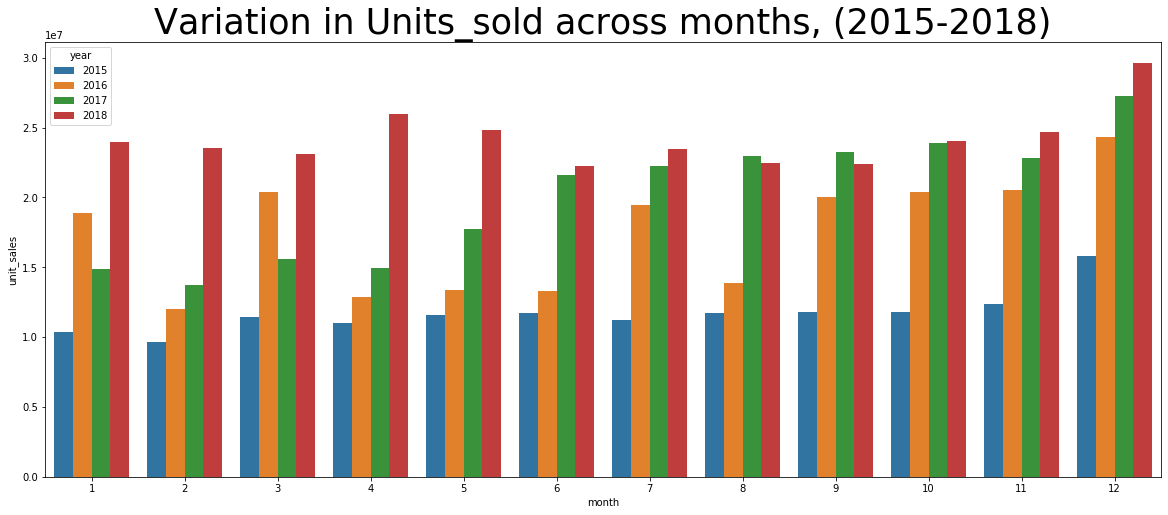

In [ ]:
plotdata = Sales_trainData.groupby(['year','month'])['unit_sales'].sum()
plotdata = pd.DataFrame(plotdata)
plotdata.reset_index(inplace=True)
(plotdata, ['year','month'], object);
plt.figure(figsize=(20,8))
plt.title("Variation in Units_sold across months, (2015-2018)",fontsize=35)
sns.barplot(x='month', y='unit_sales', hue='year', data=plotdata)

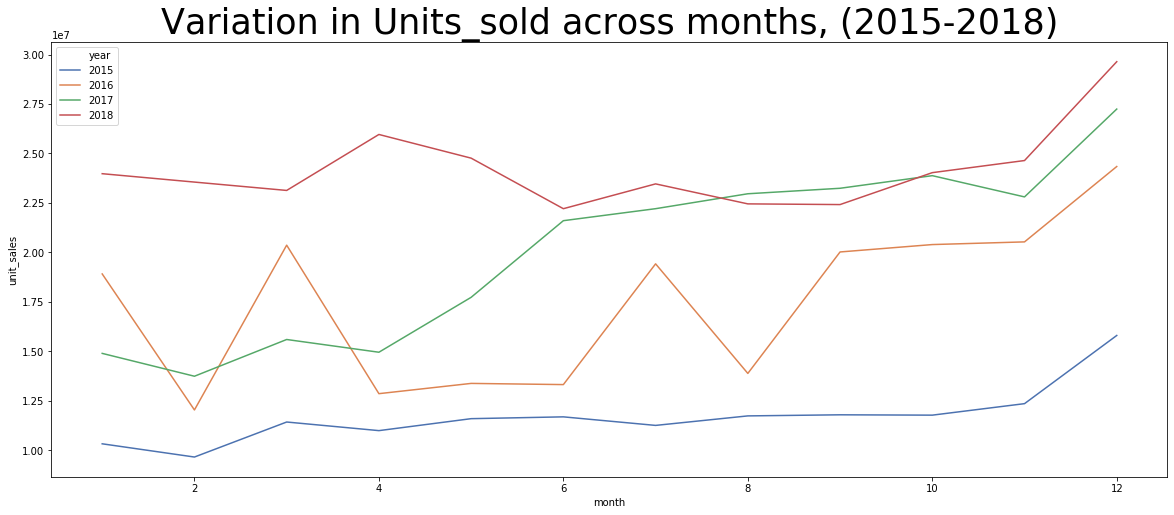

In [ ]:
plotdata = Sales_trainData.groupby(['year','month'])['unit_sales'].sum()
plotdata = pd.DataFrame(plotdata)
plotdata.reset_index(inplace=True)
(plotdata, ['year','month'], object);
plt.figure(figsize=(20,8))
plt.title("Variation in Units_sold across months, (2015-2018)",fontsize=35)
sns.lineplot(x='month', y='unit_sales', hue='year',palette='deep', data=plotdata)

In [ ]:
df=Sales_trainData[['item_id','unit_sales','onpromotion']]
df=df.sort_values(by='unit_sales',ascending=True)
df.head(10)

,item_id,unit_sales,onpromotion
80458640,item_1695931,0.001,False
57978899,item_1695837,0.003,False
92931829,item_1751176,0.003,False
41930965,item_1109235,0.003,False
76520880,item_623317,0.003,False
74807304,item_1473486,0.004,False
49951846,item_311994,0.004,False
67716726,item_820003,0.005,False
82066064,item_1954663,0.005,False
82959554,item_1473484,0.006,True


**How much sales happend at each of the location**

The location_44 has generated highest sales followed by location_45, location_47

In [ ]:
plotdata = Sales_trainData.groupby(['locationId'])['unit_sales'].sum()
plotdata = pd.DataFrame(plotdata)
plotdata.reset_index(inplace=True)
plotdata.nlargest(10, 'unit_sales')

,locationId,unit_sales
38,location_44,5.169728e+07
39,location_45,4.493881e+07
41,location_47,4.196799e+07
22,location_3,4.185296e+07
43,location_49,3.511569e+07
40,location_46,3.473206e+07
42,location_48,2.997794e+07
46,location_51,2.759293e+07
51,location_8,2.524470e+07
45,location_50,2.378165e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text xticklabel objects>)

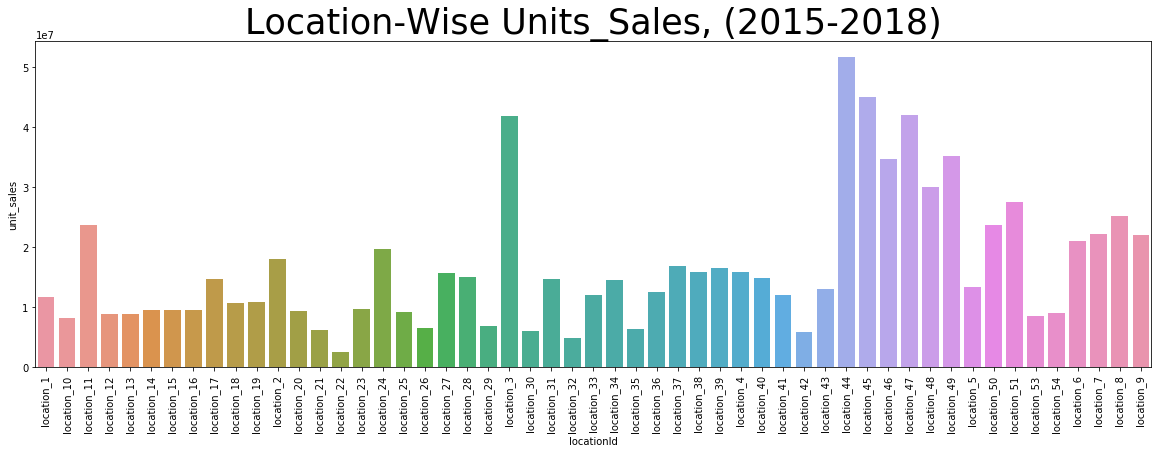

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Location-Wise Units_Sales, (2015-2018)",fontsize=35)
plot = sns.barplot(x='locationId', y='unit_sales', data=plotdata)
plt.xticks(rotation='vertical')

# **Total Number of Items Across Each Category**

In [ ]:
Sales_agrregation=Sales_trainData.groupby(['category_of_item']).agg({
    'item_id':'count'
})

In [ ]:
Sales_agrregation.head(10)

,item_id
category_of_item,
baked_items / bread_based,3841977
beauty_products,143649
beverages,13757701
cleaning_utilities,14254926
dairy_items,7273847
deli_items,3447747
eggs,1338722
frozen_food,1304007
grocery_items,37436787


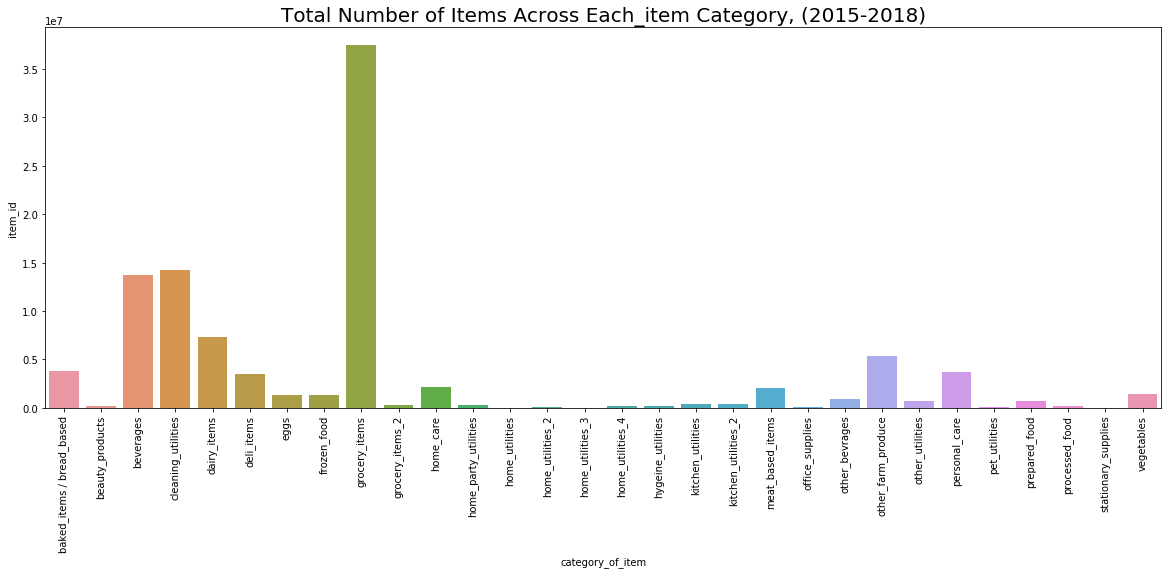

In [ ]:
Sales_agrregation.plot(kind='bar', legend=False, width=0.8, figsize=(20,7))
plt.title("Total Number of Items Across Each_item Category, (2015-2018)",fontsize=20)
sns.barplot(x=Sales_agrregation.index,y=Sales_agrregation.item_id,data=Sales_agrregation)

**What is the popular item based on unit sales and its corresponding category**

grocery_items and beverages are the most popular categor_items sold among the the top category items sold from the Small basket retailer.

In [ ]:
plotdata = Sales_trainData.groupby(['item_id','category_of_item'])['unit_sales'].sum()
plotdata = pd.DataFrame(plotdata)
plotdata.reset_index(inplace=True)
plotdata.nlargest(10, 'unit_sales')

,item_id,category_of_item,unit_sales
44932,item_1503844,other_farm_produce,4.844463e+06
2222,item_1047679,beverages,4.806317e+06
105392,item_807493,beverages,4.072461e+06
87068,item_364606,grocery_items,3.944432e+06
42832,item_1473474,other_farm_produce,3.875422e+06
106262,item_819932,beverages,3.628822e+06
82478,item_265559,grocery_items,3.578641e+06
38672,item_1463992,beverages,3.461641e+06
95018,item_559870,grocery_items,3.254170e+06
92490,item_502331,baked_items / bread_based,3.245100e+06


## **How are the sales for Perishable and non-perishable goods?**

The unit sales for non-perishable goods are more than perishable goods.

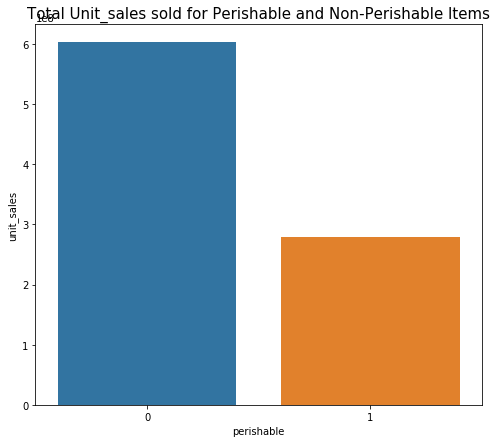

In [ ]:
plotdata = Sales_trainData.groupby(['perishable'])['unit_sales'].sum()
plotdata = pd.DataFrame(plotdata)
plotdata.reset_index(inplace=True)
plt.figure(figsize=(8,7))
plt.title("Total Unit_sales sold for Perishable and Non-Perishable Items",fontsize=15)
sns.barplot(x='perishable', y='unit_sales', data=plotdata)

# Part 3: Model Building

## **Linear Regression**

In [ ]:
####Loading the train_data file
train_data = readPickleFile('train_data')

#Describing about the data

In [ ]:
train_data.head(3)

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN


In [ ]:
train_data.shape

(101678735, 5)

In [ ]:
train_data.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float64
onpromotion          category
dtype: object

In [ ]:
##Removing th duplicates of the train data
train_data=train_data.drop_duplicates()

In [ ]:
train_data.shape

(101678735, 5)

In [ ]:
train_data.isna().sum()

date                  0
locationId            0
item_id               0
unit_sales            0
onpromotion    21657651
dtype: int64

In [ ]:
## Filling the 'NA' values in onprmotion column with False
train_data['onpromotion'] = train_data['onpromotion'].fillna(False)

In [ ]:
train_data.isna().sum()

date           0
locationId     0
item_id        0
unit_sales     0
onpromotion    0
dtype: int64

In [ ]:
### Writing the preprocess train_data file into train_data_preprocess pickle file for further use 
pickleFileDump('train_data_Preprocess',train_data)

In [ ]:
ls

EDA.ipynb             Pickled_files/         train_transactions
FinalDataset          salesData              train_transactions.csv
item_data             test.csv               unit_sales_predc.csv
item_details.csv      test_data              X_test
location_data         train.csv              X_train
location_details.csv  train_data             y_test
merge1                train_data_Preprocess  y_train
merge2                train_locations_items


In [38]:
train_data = readPickleFile('train_data_Preprocess')

In [39]:
###Sampling the train_data only for the last two years (2017-2018)
train_data=train_data[train_data['date']>='2017-01-01']

In [40]:
train_data.shape

(63084471, 5)

In [14]:
train_data.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float64
onpromotion          category
dtype: object

In [ ]:
train_data.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float64
onpromotion          category
dtype: object

In [41]:
### Loading the supplied input test data
test_data = pd.read_csv("test.csv",header='infer',sep=',')

In [ ]:
test_data.dtypes

id              int64
date           object
locationId     object
item_id        object
onpromotion      bool
dtype: object

In [ ]:
dtypeConversion(test_data)

In [ ]:
test_data['date']=test_data['date'].astype('datetime64[ns]')

In [ ]:
test_data.dtypes

id                      int64
date           datetime64[ns]
locationId           category
item_id              category
onpromotion              bool
dtype: object

In [ ]:
## Write a pickle file for the test data with data preprocessing steps done.
pickleFileDump('test_data',test_data)

In [ ]:
ls

EDA.ipynb             merge1          train_data
FinalDataset          merge2          train_data_Preprocess
item_data             Pickled_files/  train_locations_items
item_details.csv      test.csv        train_transactions
location_data         test_data       train_transactions.csv
location_details.csv  train.csv


In [ ]:
test_data.describe(include = 'all')

,id,date,locationId,item_id,onpromotion
count,1.482295e+06,1482295,1482295,1482295,1482295
unique,NaN,15,53,3828,2
top,NaN,2019-01-02 00:00:00,location_44,item_222879,False
freq,NaN,114225,40028,742,1301444
first,NaN,2019-01-01 00:00:00,NaN,NaN,NaN
last,NaN,2019-01-15 00:00:00,NaN,NaN,NaN
mean,7.411470e+05,NaN,NaN,NaN,NaN
std,4.279019e+05,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN
25%,3.705735e+05,NaN,NaN,NaN,NaN


In [ ]:
test_data['item_id'].nunique()

3828

In [ ]:
train_data['item_id'].nunique()

3887

In [42]:
## Feature Engineering by adding month, year and weekdays
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y.%m.%d')
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year
train_data['weekday'] = train_data['date'].dt.day

In [43]:
train_data.head(1)

,date,locationId,item_id,unit_sales,onpromotion,month,year,weekday
38594264,2017-01-01,location_25,item_103665,12.0,False,1,2017,1


In [17]:
train_data.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float64
onpromotion          category
month                   int64
year                    int64
weekday                 int64
dtype: object

In [44]:
train_data.drop('date', inplace = True, axis=1)

In [45]:
train_data.isna().sum()

locationId     0
item_id        0
unit_sales     0
onpromotion    0
month          0
year           0
weekday        0
dtype: int64

**Encoding for Location_id column**

In [46]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder ## For label encoding(converting categorical values to label)
label_encode_location_ID = LabelEncoder()

In [47]:
train_data['locationId'] = label_encode_location_ID.fit_transform(train_data['locationId'])


In [ ]:
####location_levels_total = train_data['locationId'].unique().tolist()
###enconded_values = list(range(len(location_levels_total)))
###dict_items = dict(zip(location_levels_total, enconded_values))
###train_data['locationId']=train_data['locationId'].map(dict_items)
#####train_data.locationId = train_data.locationId.astype('int32')#####

In [24]:
train_data['locationId'].head(3)

38594264    17
38594265    17
38594266    17
Name: locationId, dtype: int64

Encoding Item_id column

In [48]:
test_data = readPickleFile('test_data')

In [26]:
test_data.dtypes

id                      int64
date           datetime64[ns]
locationId           category
item_id              category
onpromotion              bool
dtype: object

In [49]:
L1 = train_data['item_id'].unique()
L2= test_data['item_id'].unique()

In [50]:
L1=pd.DataFrame(L1)
L2=pd.DataFrame(L2)

In [51]:
L3 = pd.concat([L1,L2], axis=0)
L3.columns = ['item_id']

In [52]:
L3

,item_id
0,item_103665
1,item_105575
2,item_108634
3,item_108698
4,item_108786
...,...
3823,item_1918621
3824,item_1212452
3825,item_2045545
3826,item_1976284


In [53]:
L3.sort_values(by='item_id').tail()

,item_id
652,item_999545
1916,item_999546
772,item_999546
653,item_999547
773,item_999547


In [55]:
## Label Encoding
label_encode_item_ID = LabelEncoder()
L3=label_encode_item_ID.fit(L3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
train_data['item_id'] = label_encode_item_ID.transform(train_data['item_id'])

In [120]:
test_data['item_id'] = label_encode_item_ID.transform(test_data['item_id'])

In [121]:
test_data.item_id=test_data.item_id.astype('category')

In [81]:
test_data.dtypes

id                      int64
date           datetime64[ns]
locationId           category
item_id              category
onpromotion              bool
dtype: object

In [ ]:
##ltem_levels_total = L3['item_id'].unique().tolist()
###enconded_values1 = list(range(len(ltem_levels_total)))
###dict_items1 = dict(zip(ltem_levels_total, enconded_values1))
###train_data['item_id']=train_data['item_id'].map(dict_items1)
####train_data.item_id = train_data.item_id.astype('int32')

In [58]:
train_data['item_id'].tail()

101688774    2603
101688775    2605
101688776    2606
101688777    2607
101688778    2611
Name: item_id, dtype: int64

In [59]:
train_data.dtypes

locationId        int64
item_id           int64
unit_sales      float64
onpromotion    category
month             int64
year              int64
weekday           int64
dtype: object

In [60]:
train_data.head(3)

,locationId,item_id,unit_sales,onpromotion,month,year,weekday
38594264,17,45,12.0,False,1,2017,1
38594265,17,121,23.0,False,1,2017,1
38594266,17,194,1.0,False,1,2017,1


In [63]:
## Label Encoding
label_encode_month = LabelEncoder()
train_data['month']=label_encode_month.fit_transform(train_data['month'])

In [66]:
## Label Encoding
label_encode_month = LabelEncoder()
train_data['year']=label_encode_month.fit_transform(train_data['year'])

In [67]:
## Label Encoding
label_encode_month = LabelEncoder()
train_data['weekday']=label_encode_month.fit_transform(train_data['weekday'])

In [68]:
train_data.dtypes

locationId        int64
item_id           int64
unit_sales      float64
onpromotion    category
month             int64
year              int64
weekday           int64
dtype: object

In [69]:
train_data['onpromotion'].unique()

[False, True]
Categories (2, object): [False, True]

In [70]:
#### Type conversion for onpromotion values to binary form
train_data.onpromotion.replace([True, False], [1, 0], inplace=True)

In [71]:
train_data.head(1)

,locationId,item_id,unit_sales,onpromotion,month,year,weekday
38594264,17,45,12.0,0,0,0,0


In [72]:
train_data['onpromotion'].unique()

array([0, 1])

In [73]:
train_data.dtypes

locationId       int64
item_id          int64
unit_sales     float64
onpromotion      int64
month            int64
year             int64
weekday          int64
dtype: object

In [76]:
train_data.locationId  = train_data.locationId.astype('category')
train_data.item_id  = train_data.item_id.astype('category')
train_data.month  = train_data.month.astype('category')
train_data.year  = train_data.year.astype('category')
train_data.weekday  = train_data.weekday.astype('category')


In [77]:
train_data.onpromotion = train_data.onpromotion.astype('bool')

In [78]:
train_data.dtypes

locationId     category
item_id        category
unit_sales      float64
onpromotion        bool
month          category
year           category
weekday        category
dtype: object

## Model Building

#Linear Regression

In [82]:
### Separating independent and target varibales for train, validation and test and loading them into pickle file for easy loading of data in successive models building
X = train_data.drop('unit_sales', axis=1)

In [83]:
y = train_data['unit_sales']

In [84]:
####Loading the necessary libraries to perform Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
X.head(1)

,locationId,item_id,onpromotion,month,year,weekday
38594264,17,45,False,0,0,0


In [86]:
X.shape

(63084471, 6)

In [87]:
y.shape

(63084471,)

In [88]:
y.head(1)

38594264    12.0
Name: unit_sales, dtype: float64

In [89]:
### train, test (Validation) split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [92]:
!ls

EDA.ipynb	      salesData		      train_transactions
FinalDataset	      sample_sub_XGBoost.csv  train_transactions.csv
item_data	      test.csv		      unit_sales_predctions_Linear.csv
item_details.csv      test_data		      unit_sales_pred_decisiontree.csv
location_data	      Test_data		      unit_sales_pred_XGBoost.csv
location_details.csv  train.csv		      xgb_regressor_model
merge1		      train_data	      y_test
merge2		      train_data_Preprocess   y_train
Pickled_files	      train_locations_items


In [93]:
### Writing the train, test (Validation) pickle files
pickleFileDump('X_train',X_train)
pickleFileDump('X_test',X_test)
pickleFileDump('y_train',y_train)
pickleFileDump('y_test',y_test)

In [94]:
X_train.dtypes

locationId     category
item_id        category
onpromotion        bool
month          category
year           category
weekday        category
dtype: object

In [95]:
### Initiating the Linear regreesion model and fitting on the train data
linear_regr=LinearRegression()
linear_regression = linear_regr.fit(X_train,y_train)

In [96]:
#### Predicting the target for train data
pred_train = linear_regression.predict(X_train)

In [97]:
### Customized function for calculating mean absoulte percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [98]:
### Calculating MAPE on train data
MAPE = mean_absolute_percentage_error(y_train, pred_train)

In [99]:
print(MAPE)

237.45799370338227


In [100]:
### predicting the values on test (Validation) data
pred_val = linear_regression.predict(X_test)

In [101]:
### Calulating MAPE on test (Validation) data
test_MAPE = mean_absolute_percentage_error(y_test, pred_val)

In [102]:
print(test_MAPE)

237.59710516044413


# Testdata

In [103]:
test_data = readPickleFile('test_data')

In [104]:
test_data['item_id'].sort_values().head()

953323     item_1000866
543132     item_1000866
1339350    item_1000866
1460087    item_1000866
1465910    item_1000866
Name: item_id, dtype: category
Categories (3828, object): [item_1000866, item_1001305, item_1003679, item_1004545, ..., item_996613,
                            item_999545, item_999546, item_999547]

In [105]:
test_data.shape

(1482295, 5)

In [106]:
test_data.isna().sum()

id             0
date           0
locationId     0
item_id        0
onpromotion    0
dtype: int64

In [ ]:
test_data['item_id'].nunique()

3828

In [107]:
test_data.head(3)

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False


In [108]:
## add day,month,weekday to test_data
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y.%m.%d')
test_data['month'] = test_data['date'].dt.month
test_data['year'] = test_data['date'].dt.year
test_data['weekday'] = test_data['date'].dt.day

In [109]:
test_data.drop('date', inplace = True, axis=1)

In [123]:
test_data.head(3)

,locationId,item_id,onpromotion,month,year,weekday
id,,,,,,
0,17,3881,0,1,2019,1
1,17,45,0,1,2019,1
2,17,120,0,1,2019,1


In [125]:
## Label Encoding
label_encode_year = LabelEncoder()
test_data['year']=label_encode_year.fit_transform(test_data['year'])

In [127]:
## Label Encoding
label_encode_month = LabelEncoder()
test_data['month']=label_encode_month.fit_transform(test_data['month'])

In [128]:
## Label Encoding
label_encode_month = LabelEncoder()
test_data['weekday']=label_encode_month.fit_transform(test_data['weekday'])

In [134]:
##type conversions
test_data.locationId  = test_data.locationId.astype('category')
test_data.item_id  = test_data.item_id.astype('category')
test_data.month  = test_data.month.astype('category')
test_data.year  = test_data.year.astype('category')
test_data.weekday  = test_data.weekday.astype('category')

In [135]:
test_data.dtypes

locationId     category
item_id        category
onpromotion       int64
month          category
year           category
weekday        category
dtype: object

In [129]:
test_data.head(1)

,locationId,item_id,onpromotion,month,year,weekday
id,,,,,,
0,17,3881,0,0,0,0


In [136]:
test_data.onpromotion.replace([True, False], [1, 0], inplace=True)

In [132]:
test_data.dtypes

locationId        int64
item_id        category
onpromotion       int64
month             int64
year              int64
weekday           int64
dtype: object

In [ ]:
### Encoding for LocationId column
###test_data['locationId']=test_data['locationId'].map(dict_items)
####test_data.locationId = test_data.locationId.astype('int32')

In [118]:
test_data.shape

(1482295, 6)

In [119]:
test_data.head(1)

,locationId,item_id,onpromotion,month,year,weekday
id,,,,,,
0,17,item_99197,0,1,2019,1


In [ ]:
test_data.shape

(1482295, 6)

In [122]:
test_data.head(1)

,locationId,item_id,onpromotion,month,year,weekday
id,,,,,,
0,17,3881,0,1,2019,1


In [137]:
test_data.onpromotion.replace([True, False], [1, 0], inplace=True)

In [138]:
 test_data.isna().sum()

locationId     0
item_id        0
onpromotion    0
month          0
year           0
weekday        0
dtype: int64

In [ ]:
test_data.shape

(1482295, 6)

In [139]:
### Writing the test_data with preprocessing steps done into a pickle file
pickleFileDump('Test_data',test_data)

In [140]:
ls

EDA.ipynb             sample_sub_XGBoost.csv  unit_sales_predctions_Linear.csv
FinalDataset          test.csv                unit_sales_pred_decisiontree.csv
item_data             test_data               unit_sales_pred_XGBoost.csv
item_details.csv      Test_data               xgb_regressor_model
location_data         train.csv               X_test
location_details.csv  train_data              X_train
merge1                train_data_Preprocess   y_test
merge2                train_locations_items   y_train
Pickled_files/        train_transactions
salesData             train_transactions.csv


In [141]:
###Predicting the target for the test data
pred_test = linear_regression.predict(test_data)

In [ ]:
pred_test.shape

(1482295,)

In [ ]:
pred_test

array([6.2684598 , 5.62461806, 6.04475679, ..., 8.37105208, 8.35936611,
       8.37522565])

In [ ]:
### Writing the test data predicitions into a csv file for submission
Dataframe2 = pd.DataFrame({'id' : test_data.index,
                          'unit_sales' : pred_test})
Dataframe2.to_csv('unit_sales_predc.csv',index=False)

In [ ]:
Sample_submission=pd.read_csv('unit_sales_predc.csv')

In [ ]:
Sample_submission.shape

(1482295, 2)

In [ ]:
Sample_submission.head(3)

,id,unit_sales
0,0,6.268460
1,1,5.624618
2,2,6.044757


# **Model-2**-Decision Tree

In [142]:
### Loading the input pickle files for train and test (Validation) data
X_train = readPickleFile('X_train')
X_test = readPickleFile('X_test')
y_test = readPickleFile('y_test')
y_train = readPickleFile('y_train')

In [143]:
X_train.head(4)

,locationId,item_id,onpromotion,month,year,weekday
51890776,41,2838,False,6,0,19
93879401,41,3069,False,9,1,13
56677656,40,3450,False,8,0,14
72128684,50,2778,False,2,1,1


In [144]:
X_test.head(4)

,locationId,item_id,onpromotion,month,year,weekday
99146028,47,3042,False,11,1,5
84862542,4,3341,False,6,1,12
47403646,48,3560,False,4,0,23
40145341,19,164,False,0,0,27


In [145]:
y_train.head(4)

51890776    17.0
93879401     4.0
56677656     2.0
72128684     5.0
Name: unit_sales, dtype: float64

In [146]:
y_test.head(4)

99146028     1.0
84862542     4.0
47403646    27.0
40145341     1.0
Name: unit_sales, dtype: float64

In [147]:
### Importing the necessary libraries to run Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTreeRegressor_model = DecisionTreeRegressor(max_depth=5,min_samples_leaf=10,min_samples_split=5,random_state=123,criterion='mae')
DecisionTreeRegressor_model.fit(X_train,y_train)

In [ ]:
pickleFileDump('DecisionTreeRegressor_model',DecisionTreeRegressor_model)

In [ ]:
## Get the predictions on train and test (Validation) data
pred_train = DecisionTreeRegressor_model.predict(X_train)
pred_test = DecisionTreeRegressor_model.predict(X_test)

In [ ]:
### Cal
train_mape=mean_absolute_percentage_error(y_train,pred_train)

In [ ]:
print(Train_mape)

218.55826253728017


In [ ]:
Validation_mape=mean_absolute_percentage_error(y_test,pred_test)

In [ ]:
print(Validation_mape)

218.7049848160023


In [ ]:
Test_data = readPickleFile('Test_data')

In [ ]:
pred_Test=dtr.predict(Test_data)

In [ ]:
pred_Test.shape

(1482295,)

In [ ]:
Dataframe2 = pd.DataFrame({'id' : Test_data.index,
                          'unit_sales' : pred_Test})
Dataframe2.to_csv('unit_sales_pred_decisiontree.csv',index=False)

In [ ]:
Dataframe2.head(3)

,id,unit_sales
0,0,7.012091
1,1,8.497366
2,2,5.204454


# **Model 3: XGB Regressor**

In [ ]:
### Loading the necessary Libraries to run XGBoost Regressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

In [ ]:
###Loading the necessary input files (train, Validation and test data pickle files)
X_train = readPickleFile('X_train')
X_test = readPickleFile('X_test')
y_test = readPickleFile('y_test')
y_train = readPickleFile('y_train')
Test_data = readPickleFile('Test_data')

In [ ]:
X_train.shape

(44159129, 6)

In [ ]:
X_test.shape

(18925342, 6)

In [ ]:
xgb_regressor_model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
%time xgb_regressor_model.fit(X_train,y_train,verbose=True)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:31] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 1h 53min 42s, sys: 5.56 s, total: 1h 53min 47s
Wall time: 1h 53min 50s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
### Storing the model into a pickle file to easily predict on the train data
pickleFileDump('xgb_regressor_model',xgb_regressor_model)

In [ ]:
xgb_regressor_model = readPickleFile('xgb_regressor_model')


[13:01:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
### Predictions on train and test (Validation) data
pred_train = xgb_regressor_model.predict(X_train)
pred_test = xgb_regressor_model.predict(X_test)

In [ ]:
### Calculating the predictions both on train and test (Validation) data
print("Train Error:",mean_absolute_percentage_error(y_train,pred_train))

print("Test Error:",mean_absolute_percentage_error(y_test, pred_test))

Train Error: 61.964722403862616
Test Error: 61.95000128333308


In [ ]:
### Predictions on the test data

In [ ]:
pred_Test = xgb_regressor_model.predict(Test_data)

In [ ]:
## writing the predictions of test data into a csv file for submission
Dataframe2 = pd.DataFrame({'id' : Test_data.index,
                          'unit_sales' : pred_Test})
Dataframe2.to_csv('unit_sales_pred_XGBoost.csv',index=False)

In [ ]:
Dataframe2.head(4)

,id,unit_sales
0,0,1.085582
1,1,1.085582
2,2,1.085582
3,3,1.085582


# XGBoost Tuning Model-1

In [ ]:
xgb_regressor_model_1=XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=110,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)
%time xgb_regressor_model_1.fit(X_train,y_train,verbose=True)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 14min 3s, sys: 4.07 s, total: 14min 7s
Wall time: 14min 7s


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=110,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [ ]:
### Predictions on train and test (Validation) data
pred_train = xgb_regressor_model_1.predict(X_train)
pred_test = xgb_regressor_model_1.predict(X_test)

In [ ]:
### Calculating the predictions both on train and test (Validation) data
print("Train Error:",mean_absolute_percentage_error(y_train,pred_train))

print("Test Error:",mean_absolute_percentage_error(y_test, pred_test))

Train Error: 102.42354251702115
Test Error: 102.47667726782032


#Model 4 - Random Forest

In [ ]:
#Loading the necessary libraries to run the model
from sklearn.ensemble import RandomForestRegressor
random_Forest = RandomForestRegressor(n_estimators= 100, max_depth= 10,criterion='mse')

In [ ]:
##Fit a model
random_Forest.fit(X_train,y_train)

In [ ]:
###Get the predictions on train and validation data
pred_train = randomForest.predict(X_train)
pred_test = randomForest.predict(X_test)

In [ ]:
###Get prediction values for test data
pred_test = randomForest.predict(Test_data)

In [ ]:
## print Mape for train and test
print('Train Mape', mean_absolute_percentage_error(y_train, pred_train))
print('Test Mape', mean_absolute_percentage_error(y_test, pred_test))

#Operation Team Question and Answers

In [ ]:
###Loading the test data
test_data = pd.read_csv('test.csv',header='infer',sep=',')

In [ ]:
test_data.head(4)

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False


In [ ]:
test_data.tail(4)

,id,date,locationId,item_id,onpromotion
1482291,1482291,2019-01-15,location_54,item_2048421,False
1482292,1482292,2019-01-15,location_54,item_2048471,False
1482293,1482293,2019-01-15,location_54,item_2048515,False
1482294,1482294,2019-01-15,location_54,item_2048674,False


In [ ]:
test_data.shape

(1482295, 5)

In [ ]:
##Loading the predictions data
predict_XGBOOST_data = pd.read_csv('sample_sub_XGBoost.csv',header='infer',sep=',')

In [ ]:
predict_XGBOOST_data.head(5)

,id,unit_sales
0,0,1.085583
1,1,1.085583
2,2,1.085583
3,3,1.085583
4,4,1.085583


In [ ]:
predict_XGBOOST_data.shape

(1482295, 2)

In [ ]:
###Merging the predictions data with test data
merge_data1=predict_XGBOOST_data.merge(test_data, how='left', left_on = 'id', right_on= 'id')

In [ ]:
merge_data1.head(4)

,id,unit_sales,date,locationId,item_id,onpromotion
0,0,1.085583,2019-01-01,location_25,item_99197,False
1,1,1.085583,2019-01-01,location_25,item_103665,False
2,2,1.085583,2019-01-01,location_25,item_105574,False
3,3,1.085583,2019-01-01,location_25,item_105857,False


In [ ]:
merge_data1.shape

(1482295, 6)

In [ ]:
###Loading the items_details data
item_details_data = pd.read_csv('item_details.csv',header='infer',sep=',')

In [ ]:
item_details_data.head(4)

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0


In [ ]:
item_details_data.shape

(4100, 4)

In [ ]:
###Loading the locations_details data
location_details_data = pd.read_csv('location_details.csv',header='infer',sep=',')

In [ ]:
location_details_data.head(4)

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9


In [ ]:
location_details_data.shape

(54, 5)

In [ ]:
### merging merge_data1 with location data
merge_data2=merge_data1.merge(location_details_data, how='left', left_on = 'locationId', right_on= 'location_id')

In [ ]:
merge_data2.head(4)

,id,unit_sales,date,locationId,item_id,onpromotion,location_id,city,state,type,cluster
0,0,1.085583,2019-01-01,location_25,item_99197,False,location_25,Kanpur,Uttar Pradesh,D,1
1,1,1.085583,2019-01-01,location_25,item_103665,False,location_25,Kanpur,Uttar Pradesh,D,1
2,2,1.085583,2019-01-01,location_25,item_105574,False,location_25,Kanpur,Uttar Pradesh,D,1
3,3,1.085583,2019-01-01,location_25,item_105857,False,location_25,Kanpur,Uttar Pradesh,D,1


In [ ]:
merge_data2.shape

(1482295, 11)

In [ ]:
merge_data2.shape

(1482295, 11)

In [ ]:
###merging merge_data2 with item_details_data
merge_data3=merge_data2.merge(item_details_data, how='left', left_on = 'item_id', right_on= 'item_id')

In [ ]:
merge_data3.shape

(1482295, 14)

In [ ]:
merge_data3.head(4)

,id,unit_sales,date,locationId,item_id,onpromotion,location_id,city,state,type,cluster,category_of_item,class,perishable
0,0,1.085583,2019-01-01,location_25,item_99197,False,location_25,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,1,1.085583,2019-01-01,location_25,item_103665,False,location_25,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2,1.085583,2019-01-01,location_25,item_105574,False,location_25,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0
3,3,1.085583,2019-01-01,location_25,item_105857,False,location_25,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0


In [ ]:
##drop duplicate columns
merge_data3.drop(['location_id'],axis=1,inplace=True)

In [ ]:
merge_data3.head(4)

,id,unit_sales,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,1.085583,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,1,1.085583,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2,1.085583,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0
3,3,1.085583,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0


In [ ]:
merge_data3.isna().sum()

id                  0
unit_sales          0
date                0
locationId          0
item_id             0
onpromotion         0
city                0
state               0
type                0
cluster             0
category_of_item    0
class               0
perishable          0
dtype: int64

#1. Business Unit belonging to which cluster will see the highest sales for the first 15 days of 2019?

In [ ]:
## number of sales per type, cluster
agg_cluster=merge_data3.groupby(['type','cluster']).agg({
    'unit_sales' : 'sum' })

In [ ]:
###reset index for agg_cluster
agg_cluster.reset_index(inplace=True)

In [ ]:
agg_cluster.head(4)

,type,cluster,unit_sales
0,A,5,72984.200631
1,A,11,142483.453446
2,A,14,255053.254188
3,A,17,45140.478442


In [ ]:
## sort the agg_cluster based on unit_sales values
Highest_sales = agg_cluster.sort_values(by=['unit_sales'],ascending=False)

In [ ]:
Highest_sales.head(5)

,type,cluster,unit_sales
2,A,14,255053.254188
4,B,6,198315.982751
7,C,3,153455.851149
17,D,13,145432.568451
1,A,11,142483.453446


In [ ]:
Highest_sales[Highest_sales['type']=='E']

,type,cluster,unit_sales
18,E,10,122682.338925


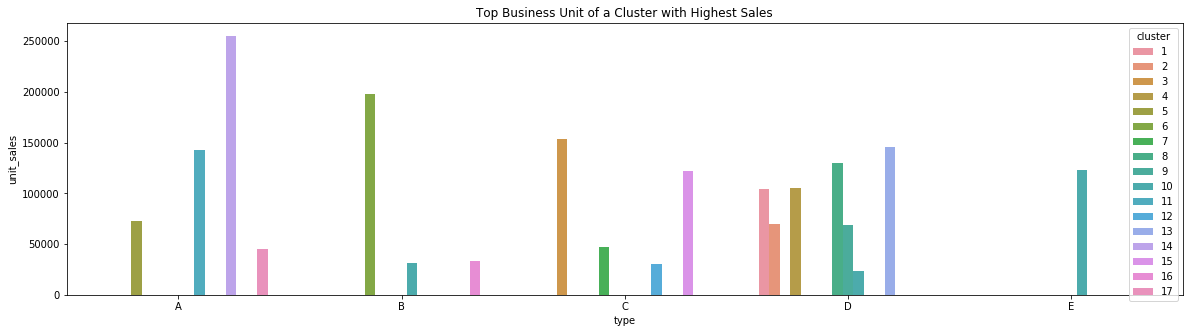

In [ ]:
##Plot highest sales per type, cluster
plt.figure(figsize=(20,5))
plt.title('Top Business Unit of a Cluster with Highest Sales')
sns.barplot(x=Highest_sales['type'],y='unit_sales', hue = Highest_sales['cluster'] ,data=Highest_sales)

#2. What are the top selling items in this cluster?

In [ ]:
Top_clusters=[14,6,3,13,10]

In [ ]:
### aggregation of unit_sales based on item_id in each cluster
agg_item_cluster = merge_data3.groupby(['cluster', 'item_id']).agg({
    'unit_sales' : 'sum'})
##reset the index
agg_item_cluster = agg_item_cluster.reset_index()
###creating the empty dataframe
agg_item_cluster_top10 = pd.DataFrame()

In [ ]:
 for i in Top_clusters:
    agg_item_cluster_top10 = agg_item_cluster_top10.append(agg_item_cluster[agg_item_cluster['cluster'] == i].nlargest(10, ['unit_sales']))

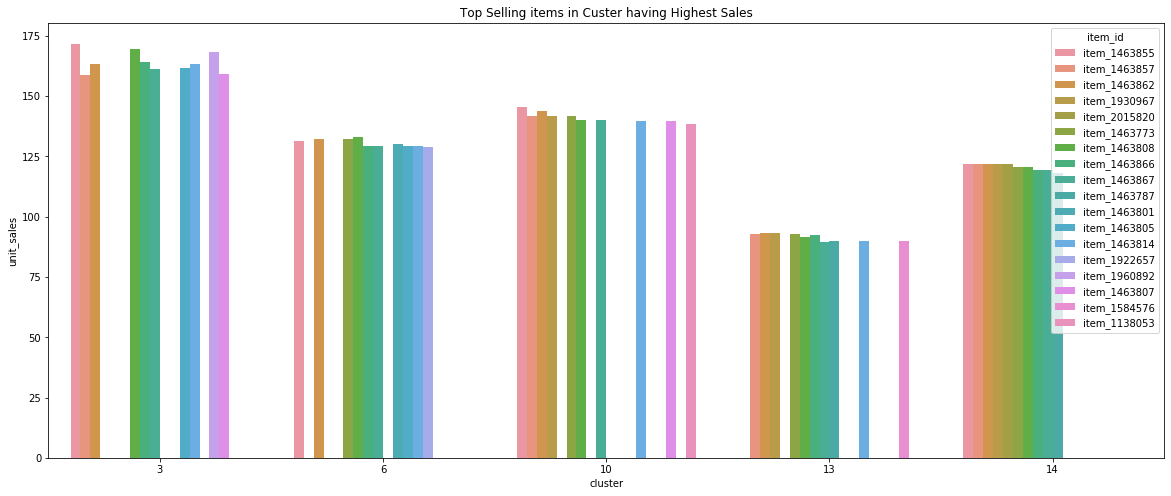

In [ ]:
## Plotting top Unit_item sales per cluster
plt.figure(figsize=(20,8))
plt.title('Top Selling items in Custer having Highest Sales')
sns.barplot(x='cluster',y='unit_sales', hue = 'item_id' ,data=agg_item_cluster_top10, orient= 'v')

In [ ]:
agg_item_cluster_top10.head()

,cluster,item_id,unit_sales
41382,14,item_1463855,121.904546
41383,14,item_1463857,121.904546
41386,14,item_1463862,121.904546
41956,14,item_1930967,121.904546
42428,14,item_2015820,121.904546


#3. What is the rate of purchase per week for these items?

In [ ]:
Data=merge_data3.copy()

In [ ]:
Data.head(3)

,id,unit_sales,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,1.085583,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,1,1.085583,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2,1.085583,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0


In [ ]:
###Adding year,month and day features to the test_data
Data['date'] = pd.to_datetime(Data['date'], format='%Y.%m.%d')
Data['year'] = Data['date'].dt.year
Data['month'] = Data['date'].dt.month
Data['week'] = Data['date'].dt.week
Data['day'] = Data['date'].dt.day

In [ ]:
Data[['year','month','week','day']].head()

,year,month,week,day
0,2019,1,1,1
1,2019,1,1,1
2,2019,1,1,1
3,2019,1,1,1
4,2019,1,1,1


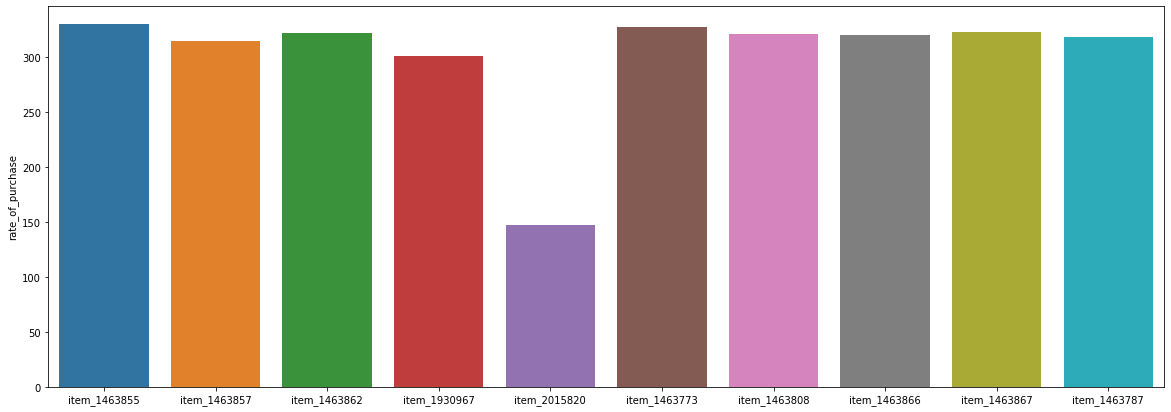

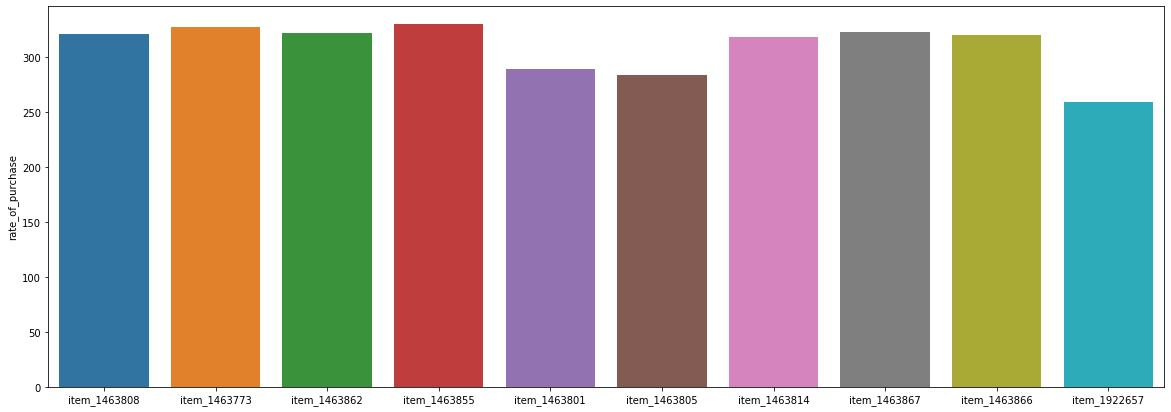

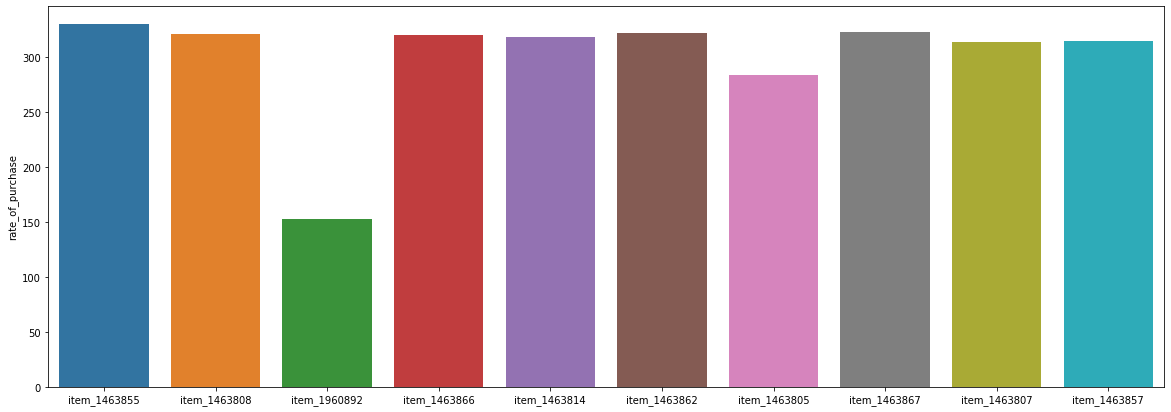

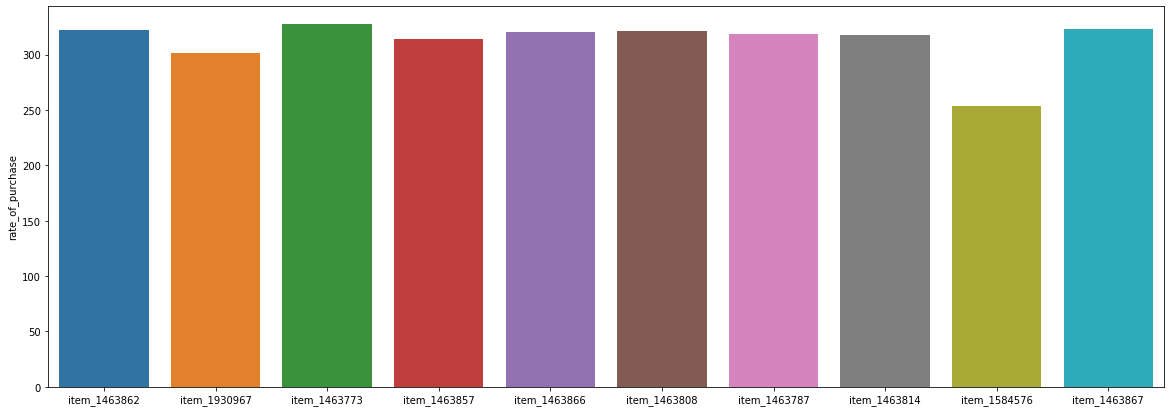

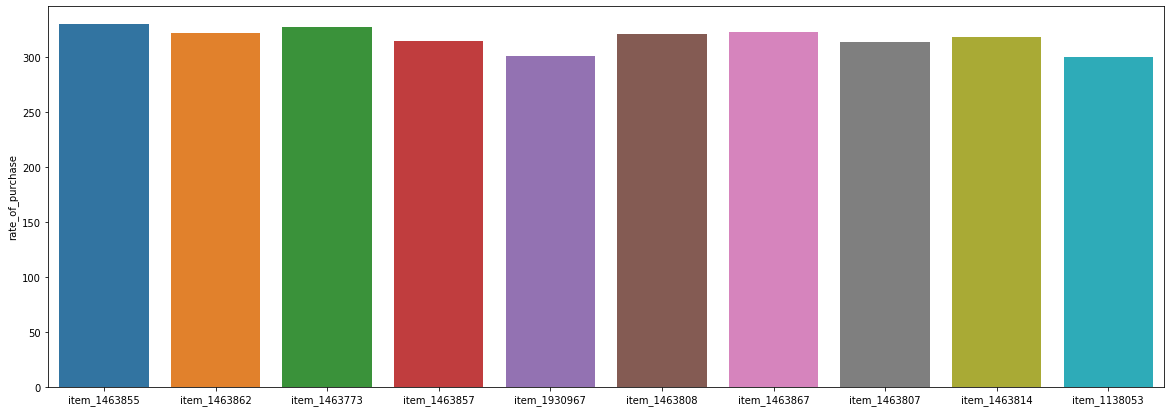

In [ ]:
## plot rate of purchase per week 
for cluster in Top_clusters:
  ## get item list from top 10 clusters
    X = agg_item_cluster_top10[agg_item_cluster_top10['cluster']  == cluster]['item_id']
    ##create empty dataframe
    rx = pd.DataFrame()
    for i in X:
      if Data['item_id'].eq(i).any():
        temp = pd.DataFrame({'rate_of_purchase' : Data[Data['item_id'].eq(i)]['unit_sales'].sum()/4}, index = [i])
        rx = pd.concat([rx, temp])
    plt.figure(figsize=(20,7))
    sns.barplot(x=rx.index,y='rate_of_purchase', data=rx)

# Summary & Conclusion

*   The objective of this project is to help a E-commerce based grocery retailer (Small Basket) based in India in effective management of their supply chain and delivery team by accurately predicting the sales during the forecast period (1st-15th Jan 2019).
*   Historical Data (2015-2018) of unit sales of the retailer across its various business locations are provided. The inputs are supplied through CSV files
     
         a. Train.csv
         b. Train_transactions.csv.
         c. items.csv
         d. locations.csv
The given problem is converted into machine learning problem by building a model that can help the retailer in predicting its sales during the forecast period (1st Jan-19 - 15th Jan-19). Further the ML model also helps the retailer in predicting their sales for any given period provided the inputs are supplied accordingly to the model for prediction. 

*   The entire project is carried out in three steps by which buisness insights are drawn to help the retailer for optimum inventory mangement.
         A. Data Exploration & Visualization
         B. Models Building
         C. Validation & Parameter Tuning

**A. Data Exploration & Visualization (EDA)**

 The input data provided contains sales of the retailer across the various locations, items,their categories for different time periods. The input files are merged using Key columns into a single file and further preprocessing steps such as type casting, removing duplicates, and saving into pickle for memrory optimization is done. Various possible plots, which includes, **Bar, Line and scatter** plots are drawn to have a proper understanding of the data before building a model.

**B. Model Building**

Feature engineering is carried out by extracting the new features such as **month**, **day** and **years** for effective model building. The vanilla Linear Regression is built and coressponding predictions on train and validation and test data are calculated. Their is scope of improving the evaluation metric **MAPE** by building the advanced models such as Decision Tree, XGBoost etc. Accordingly MAPE is calculated for these models. Challenges such as converting categorical columns to numeric is addressed. From the above built models, **XGBOOSt** gave a minimal **MAPE** and hence predictions for unit sales on test data are calculated.


**C. Validation and Paramter Tuning**

The parameter tuning is carried out on **XGBoost** model by fine tuning the parameters such as n_estimators and learning_rate. Improvement on **MAPE** is not observed when compared to **XGBoost**. Hence, predictions on test data unit sales is carried on Vanila XGBoost and corresponding business recommendations are drawn from the model.

**Business Recommendations:**

Recommendations such as top selling buisness units across each cluster, the corresponding items and their rate of purchase per week are drawn to help the retailer for effective inventory management during the forecast period.

